In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alterada-itau-planilha-de-sries-histricas-3t23/alterada_ITAU_Planilha de Sries Histricas 3T23.xlsx


In [27]:
#essa é uma versão preparada do arquivo encontrado nesta rota
#https://www.itau.com.br/relacoes-com-investidores/resultados-e-relatorios/central-de-resultados/
#/kaggle/input/alterada-itau-planilha-de-sries-histricas-3t23/alterada_ITAU_Planilha de Sries Histricas 3T23.xlsx

In [28]:
import matplotlib.pyplot as plt

In [29]:
!pip install -U statsmodels

In [30]:
!pip install pmdarima

In [31]:

df = pd.read_excel(
    '/kaggle/input/alterada-itau-planilha-de-sries-histricas-3t23/alterada_ITAU_Planilha de Sries Histricas 3T23.xlsx',
    sheet_name='Sheet1',
    index_col='T',
    parse_dates=True)

In [32]:
df

,1.0.0.CIRCULANTE E NÃO CIRCULANTE..,1.1.0. .DISPONIBILIDADES.,1.2.0..APLICAÇÕES INTERFINANCEIRAS DE LIQUIDEZ .,1.2.1...Aplicações no Mercado Aberto,1.2.2...Aplicações no Mercado Aberto e Depósitos Interfinanceiros- Recursos Garantidores das Provisões Técnicas,1.2.3...Aplicações em Depósitos Interfinanceiros,1.3.0..TÍTULOS E VALORES MOBILIÁRIOS E INSTRUMENTOS FINANCEIROS DERIVATIVOS.,1.3.1...Carteira Própria,1.3.2...Vinculados a Compromissos de Recompra,1.3.3...Vinculados a Prestação de Garantias,...,2.2.2...Outras Imobilizações,2.2.3...(Depreciações Acumuladas),2.3.0..IMOBILIZADO DE ARRENDAMENTO MERCANTIL OPERACIONAL.,2.3.1...Bens Arrendados,2.3.2...(Amortização Acumulada),2.4.0..ÁGIO E INTANGÍVEL.,2.4.1...Ágio,2.4.2...Ativos Intangíveis,2.4.3...(Amortização Acumulada),3.0.0.TOTAL DO ATIVO ..
T,,,,,,,,,,,,,,,,,,,,,
2009-03-31,6.141466e+05,13061.613,126541.559,103342.720,2014.112,21184.727,136248.321,54655.527,4547.798,14482.648,...,6669.552,-6865.828,8.608,18.553,-9.945,3953.164,0.000,4793.665,-840.501,6.245409e+05
2009-06-30,5.862787e+05,9377.879,128325.715,106141.913,2379.931,19803.871,124744.737,53177.391,3651.382,10750.797,...,6830.885,-7051.976,7.880,18.553,-10.673,3761.014,0.000,4865.080,-1104.066,5.963871e+05
2009-09-30,6.024401e+05,10325.257,137964.207,118544.424,2823.103,16596.680,122576.312,41166.291,8726.174,10057.225,...,6535.196,-6836.462,15.231,32.794,-17.563,3587.531,0.000,4879.702,-1292.171,6.123989e+05
2009-12-31,5.979783e+05,10594.442,139195.495,118700.097,3034.353,17461.045,120188.564,36390.840,9480.095,10589.641,...,6183.663,-6117.061,6.424,18.553,-12.129,3748.220,0.000,5198.641,-1450.421,6.082732e+05
2010-03-31,6.195167e+05,10921.013,136620.317,118766.044,3634.839,14219.434,119250.544,39761.593,9776.872,10619.340,...,5984.076,-6013.028,5.697,18.553,-12.856,3190.478,0.000,4718.353,-1527.875,6.302324e+05
2010-06-30,6.369818e+05,12130.949,115482.604,98368.250,3431.152,13683.202,126779.992,40796.637,18224.087,7845.780,...,7178.791,-6217.442,4.969,18.553,-13.584,3023.570,24.288,4734.737,-1735.455,6.474852e+05
2010-09-30,6.721978e+05,10805.360,112879.492,95793.859,3533.289,13552.344,139690.093,52615.216,14534.000,8596.292,...,7560.197,-6418.821,4.241,18.553,-14.312,2983.108,74.467,4756.951,-1848.310,6.829500e+05
2010-12-31,7.404641e+05,10096.540,86358.721,68177.933,3345.937,14834.851,186562.415,48644.585,63494.185,9100.234,...,7998.898,-6566.849,3.999,18.553,-14.554,3001.474,67.617,4871.675,-1937.818,7.514431e+05
2011-03-31,7.685789e+05,11762.032,99628.138,83795.752,3242.730,12589.656,183171.120,55292.000,49004.415,8729.767,...,8262.238,-6746.994,0.000,-,-,2958.453,67.617,4969.818,-2078.982,7.796398e+05


In [33]:
display(df.describe())

,1.0.0.CIRCULANTE E NÃO CIRCULANTE..,1.1.0. .DISPONIBILIDADES.,1.2.0..APLICAÇÕES INTERFINANCEIRAS DE LIQUIDEZ .,1.2.1...Aplicações no Mercado Aberto,1.2.2...Aplicações no Mercado Aberto e Depósitos Interfinanceiros- Recursos Garantidores das Provisões Técnicas,1.2.3...Aplicações em Depósitos Interfinanceiros,1.3.0..TÍTULOS E VALORES MOBILIÁRIOS E INSTRUMENTOS FINANCEIROS DERIVATIVOS.,1.3.1...Carteira Própria,1.3.2...Vinculados a Compromissos de Recompra,1.3.3...Vinculados a Prestação de Garantias,...,2.2.0..IMOBILIZADO .,2.2.1...Imóveis,2.2.2...Outras Imobilizações,2.2.3...(Depreciações Acumuladas),2.3.0..IMOBILIZADO DE ARRENDAMENTO MERCANTIL OPERACIONAL.,2.4.0..ÁGIO E INTANGÍVEL.,2.4.1...Ágio,2.4.2...Ativos Intangíveis,2.4.3...(Amortização Acumulada),3.0.0.TOTAL DO ATIVO ..
count,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01
mean,1.412241e+06,25513.951898,220497.262068,186121.185305,2548.000356,31828.076407,415451.53922,147765.168356,51358.019508,15152.517068,...,6095.798627,4142.063780,11983.964763,-10030.229915,0.983603,10731.797508,880.394356,17840.886288,-7989.483136,1.435883e+06
std,5.774133e+05,17688.671000,70496.555540,63604.327794,745.924250,15390.316988,231121.73114,88835.827429,36146.021413,14216.885751,...,961.635930,481.220501,3241.199632,2938.606944,2.792391,5466.455602,1351.387649,12067.232507,7549.806573,5.866819e+05
min,5.862787e+05,9377.879000,86358.721000,68177.933000,678.000000,12589.656000,119250.54400,36390.840000,3651.382000,2626.863000,...,4072.414000,3250.273000,5984.076000,-15080.000000,0.000000,2958.453000,0.000000,4718.353000,-24577.000000,5.963871e+05
25%,9.691404e+05,13852.112000,161497.508500,133397.447000,2138.516500,21898.609000,247880.03400,86627.178000,26371.344000,7796.864500,...,5447.907000,4002.181500,9159.157000,-12379.486500,0.000000,4750.708500,94.056000,6480.148000,-13222.982500,9.873205e+05
50%,1.369571e+06,18749.350000,232362.309000,194766.725000,2698.873000,26539.239000,357549.35000,123194.782000,45193.102000,10619.340000,...,6386.713000,4276.598000,12144.802000,-9640.474000,0.000000,13713.000000,841.000000,18095.702000,-3925.075000,1.396735e+06
75%,1.826971e+06,33124.295000,280276.319500,243765.367500,3094.127000,39929.623500,575635.52450,196476.650000,63282.969000,13911.739000,...,6621.695000,4374.397000,14488.244000,-7136.766500,0.000000,15422.008000,1235.482000,26908.136000,-1969.043500,1.864066e+06
max,2.640829e+06,101034.000000,326336.000000,289380.316000,3634.839000,73067.000000,946123.00000,364089.000000,165234.000000,55970.000000,...,7560.821000,5074.000000,17328.000000,-6013.028000,15.231000,18348.000000,10068.929000,41415.000000,-840.501000,2.678896e+06


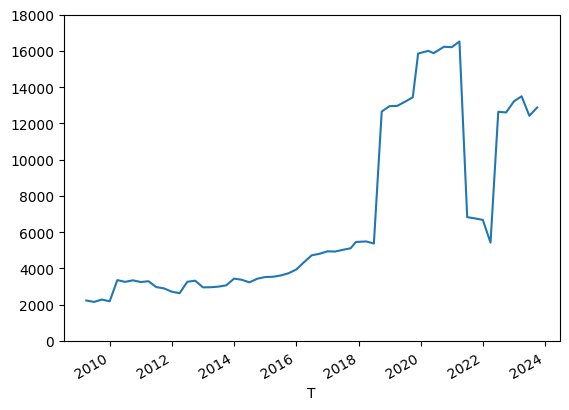

In [34]:
df['data']=df['2.1.0..INVESTIMENTOS .']
#df['data'].plot();
df['data'].plot(ylim=(0, 18000)) ;

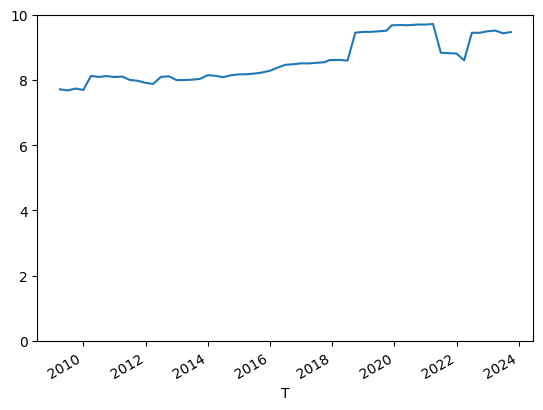

In [35]:

df['LogData'] = np.log(df['2.1.0..INVESTIMENTOS .'])
#df['LogINVESTIMENTOS'].plot();
df['LogData'].plot(ylim=(0, 10)) ;

In [36]:
split = int (0.7*len(df))
Ntest = len(df)-split
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
len(df)-split

18

In [37]:
import pmdarima as pm

In [38]:
"""
model = pm.auto_arima(train['LogData'],
                      trace=True,
                      method='bfgs', 
                      suppress_warnings=True,
                      seasonal=True, m=4,
                      D=4,
                      start_p=1, 
                      start_q=1,
                      max_p=7, 
                      max_q=7, 
                      d=1, 
                      max_d=7)
"""

"\nmodel = pm.auto_arima(train['LogData'],\n                      trace=True,\n                      method='bfgs', \n                      suppress_warnings=True,\n                      seasonal=True, m=4,\n                      D=4,\n                      start_p=1, \n                      start_q=1,\n                      max_p=7, \n                      max_q=7, \n                      d=1, \n                      max_d=7)\n"

In [39]:
model = pm.auto_arima(train['LogData'],
                      trace=True,
                      method='bfgs', 
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-31.105, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-27.528, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-27.602, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-30.048, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=-29.129, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=-29.144, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=-27.439, Time=0.59 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=-29.496, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=-29.554, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=-27.806, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4] intercept
Total fit time: 2.427 seconds


In [40]:
from sklearn.metrics import r2_score

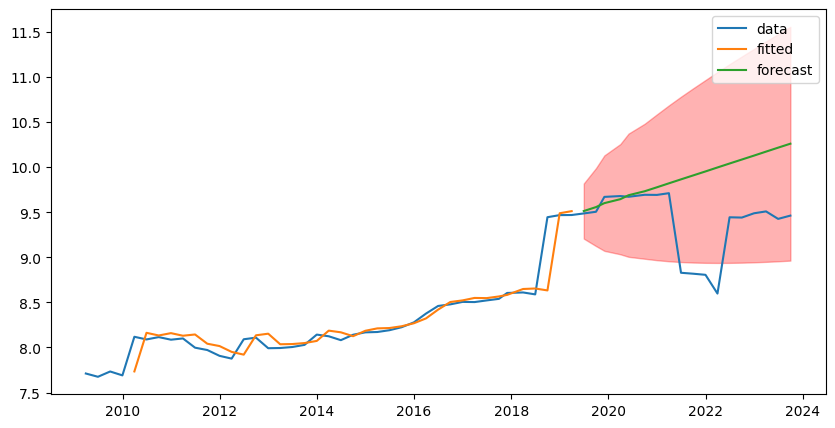

In [41]:

train_pred = model.predict_in_sample(start=4, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True,alpha=0.05)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogData'], label='data')
ax.plot(train.index[4:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
#ax.set_ylim(ymin=0)
ax.legend();

In [42]:

print('r2_score : ', ('{:.3f}'.format(r2_score(test['LogData'], np.exp(test_pred))))  )

r2_score :  -3508731540.371


In [43]:
df_diff_upper=[]
df_diff_lower=[]

df_diff_pred_data=[]

#compare to upper boundaries
negatives=[]
j = 0
for i in df['LogData'].iloc[-Ntest:]:
    #upper 0
    df_diff_upper.append(confint[j,1] - i)
    if (confint[j,1] - i)<0:
        negatives.append(j)
    j += 1
    

#compare to lower boundaries
j = 0
for i in df['LogData'].iloc[-Ntest:]:
    #upper 0
    df_diff_lower.append(i-confint[j,0])
    if (i-confint[j,0])<0:
        negatives.append(j)
    j += 1
    
negatives = list( dict.fromkeys(negatives) ) 

#calculate the differences to pred
j = 0
for i in df['LogData'].iloc[-Ntest:]:
    #pred
    df_diff_pred_data.append(abs(i-test_pred.iloc[j]))
    j += 1
    

#what is the index with the greatest diference 
#give me at least one suspect
"""
j = 0
suspect = 0
great_diff = 0
for i in df['LogINVESTIMENTOS'].iloc[-Ntest:]:
    #upper 0
    if great_diff < df_diff_pred_data[j]:
        great_diff = df_diff_pred_data[j]
        suspect=j
    j += 1


df_suspect = test_pred.copy()
df_suspect.values[:] = -1
df_suspect.values[suspect] = df['LogINVESTIMENTOS'].iloc[-Ntest:][suspect]
"""

df_suspect = test_pred.copy()
df_suspect.values[:] = -1

for i in negatives:
    df_suspect.values[i] = df['LogData'].iloc[-Ntest:][i]

In [44]:
negatives

[8, 9, 10, 11]

In [45]:
len(negatives)

4

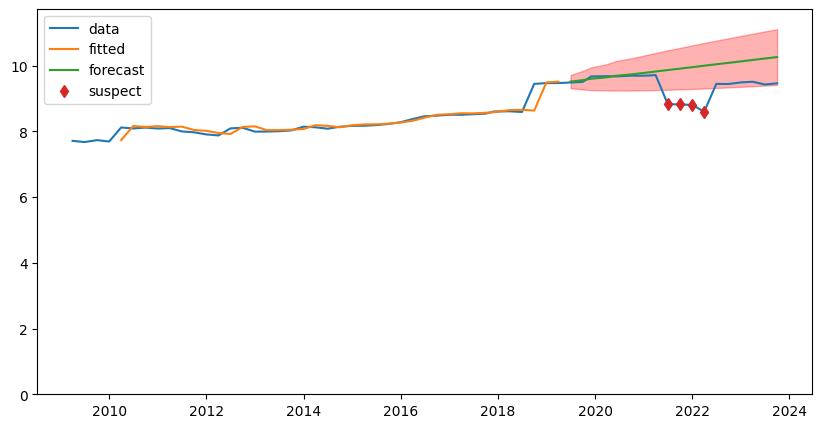

In [46]:
train_pred = model.predict_in_sample(start=4, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True,alpha=0.20)

fig, ax = plt.subplots(figsize=(10, 5))
#generalizar dataframe de dados
ax.plot(df.index, df['LogData'], label='data')
ax.plot(train.index[4:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.plot(test.index, df_suspect, label='suspect', marker='d', linestyle='None')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.set_ylim(ymin=0)
ax.legend();

In [47]:
print('r2_score : ', r2_score(test['LogData'], np.exp(test_pred)))

r2_score :  -3508731540.370637


In [48]:
#Calcular suspeitos para todas as séries
#colocar series com suspeitos em evidencia

Column Name :  1.0.0.CIRCULANTE E NÃO CIRCULANTE..
Column Type :  float64
Column Name : 1.0.0.CIRCULANTE E NÃO CIRCULANTE.. Has 0 Suspects 
Column Name :  1.1.0. .DISPONIBILIDADES.
Column Type :  float64
Column Name : 1.1.0. .DISPONIBILIDADES. Has 4 Suspects 
Column Name :  1.2.0..APLICAÇÕES INTERFINANCEIRAS DE LIQUIDEZ .
Column Type :  float64
Column Name : 1.2.0..APLICAÇÕES INTERFINANCEIRAS DE LIQUIDEZ . Has 0 Suspects 
Column Name :  1.2.1...Aplicações no Mercado Aberto
Column Type :  float64
Column Name : 1.2.1...Aplicações no Mercado Aberto Has 0 Suspects 
Column Name :  1.2.2...Aplicações no Mercado Aberto e Depósitos Interfinanceiros- Recursos Garantidores das Provisões Técnicas
Column Type :  float64
Column Name : 1.2.2...Aplicações no Mercado Aberto e Depósitos Interfinanceiros- Recursos Garantidores das Provisões Técnicas Has 12 Suspects 
Column Name :  1.2.3...Aplicações em Depósitos Interfinanceiros
Column Type :  float64
Column Name : 1.2.3...Aplicações em Depósitos Interf

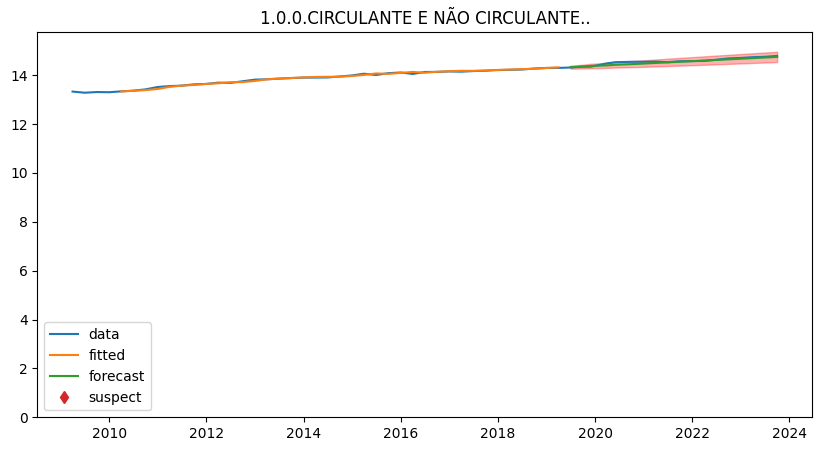

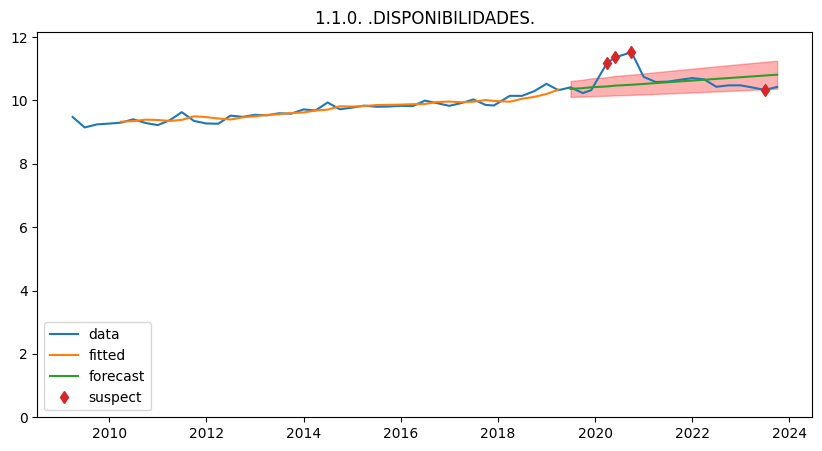

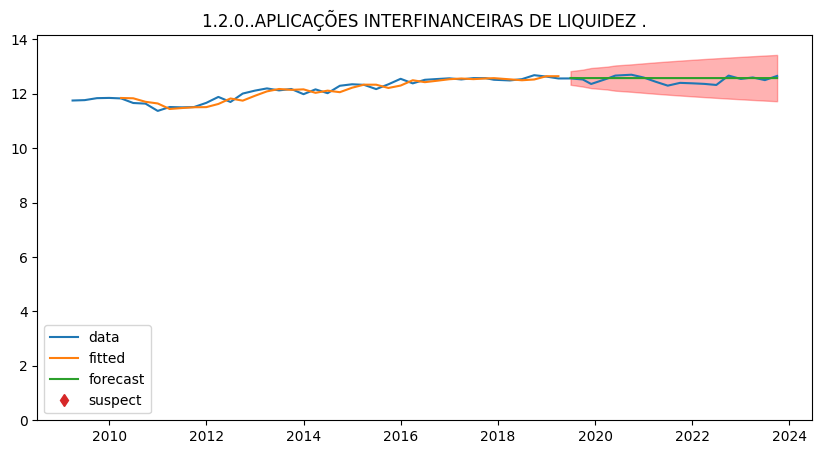

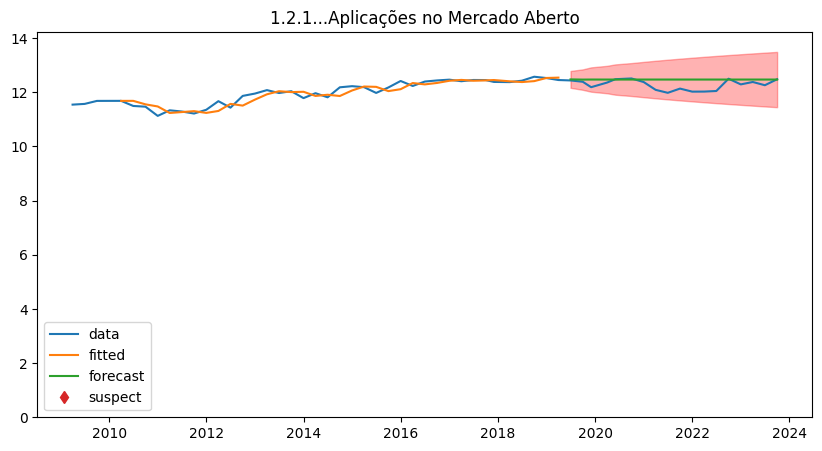

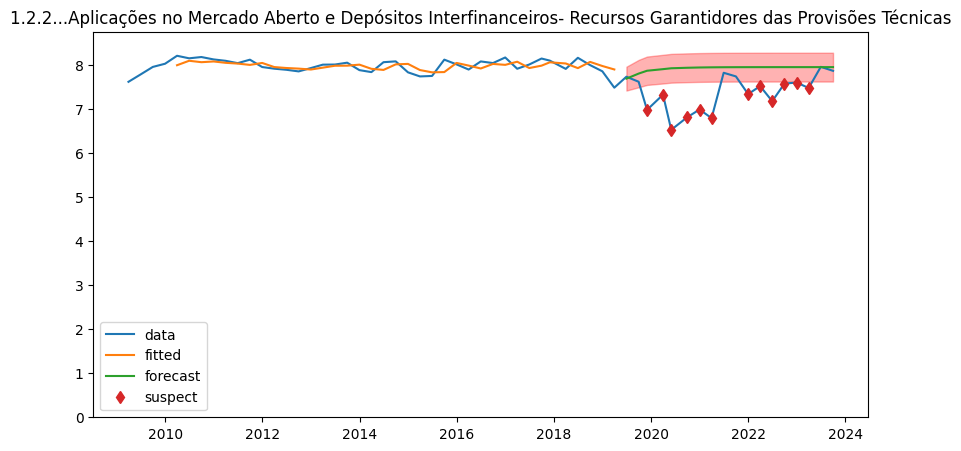

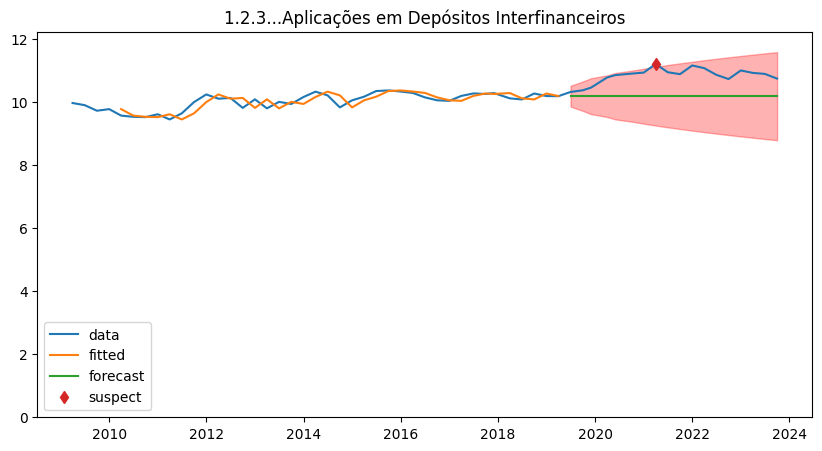

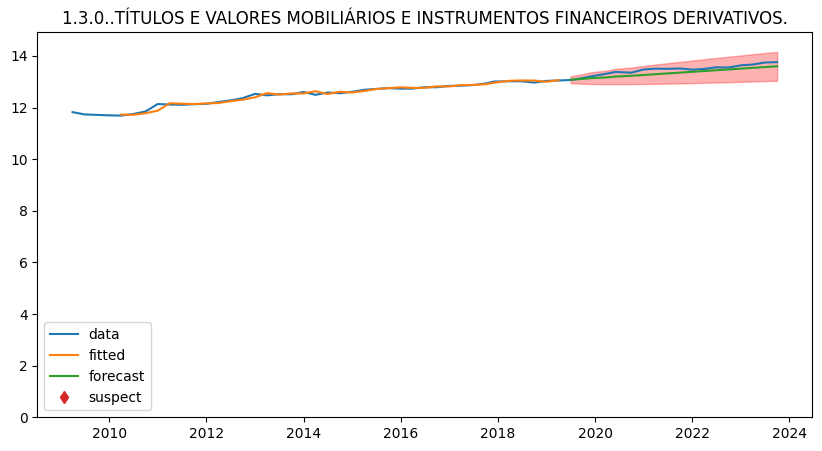

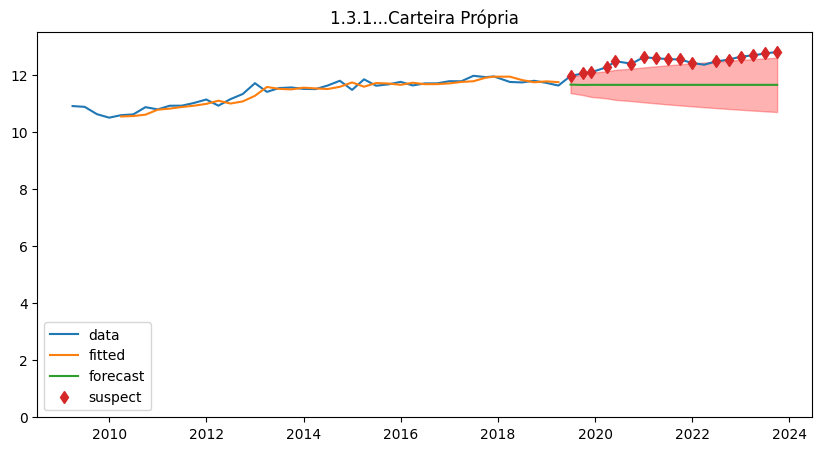

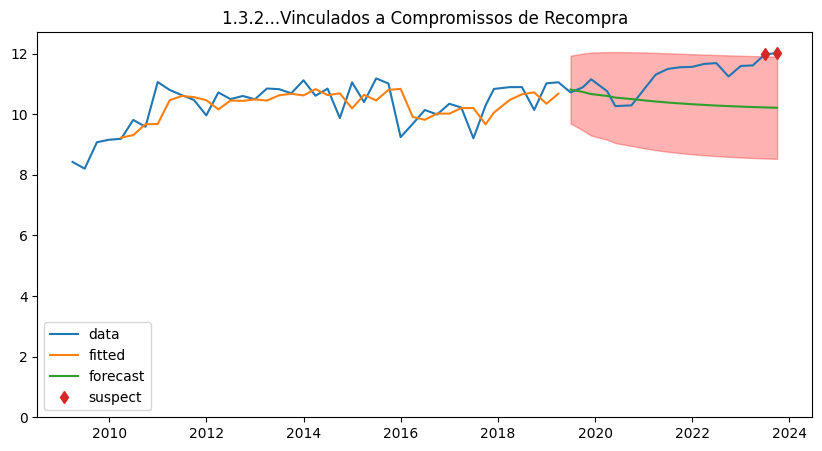

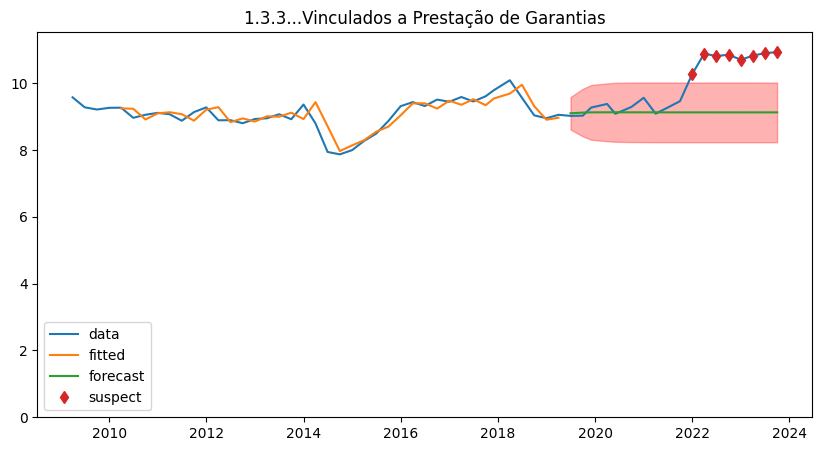

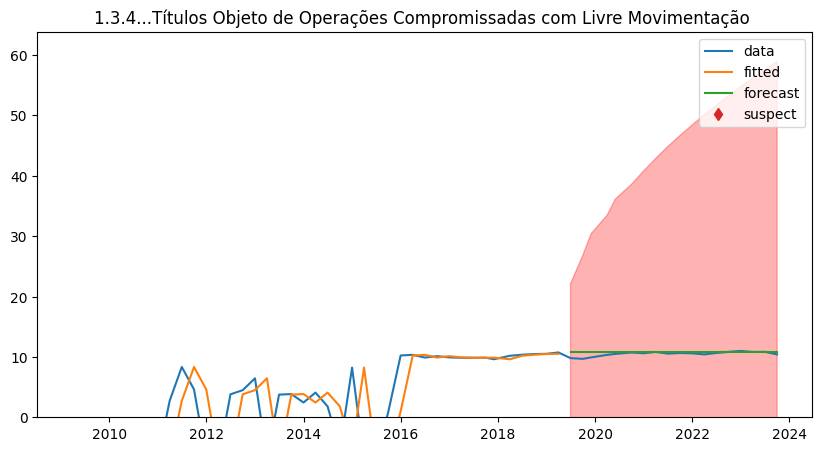

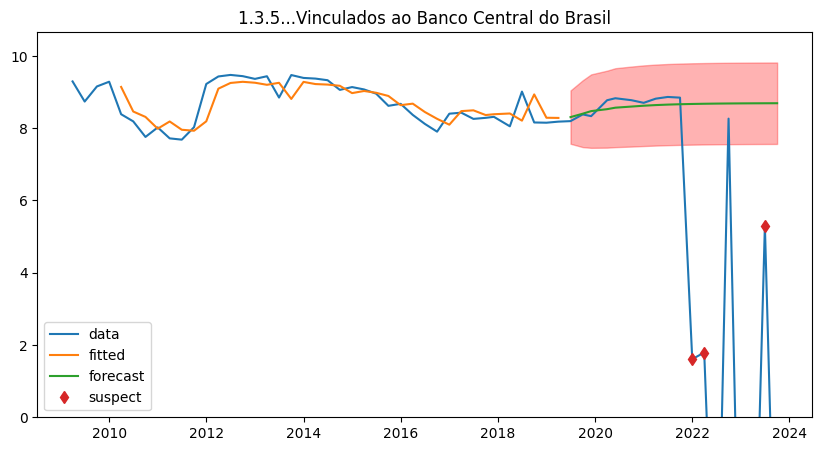

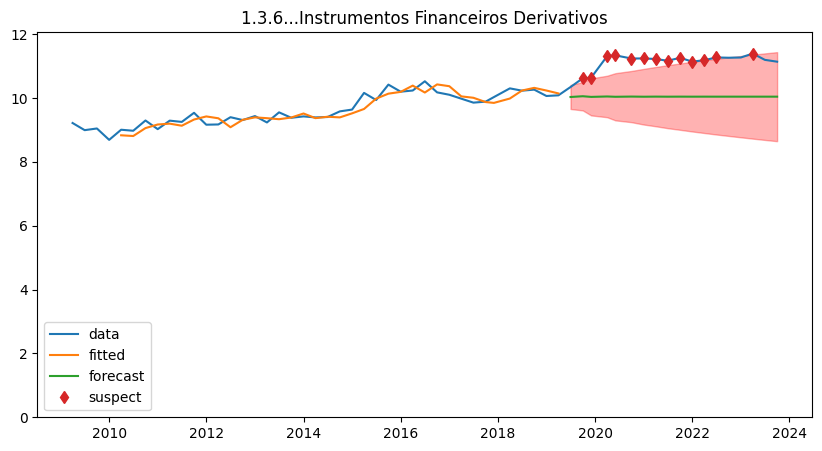

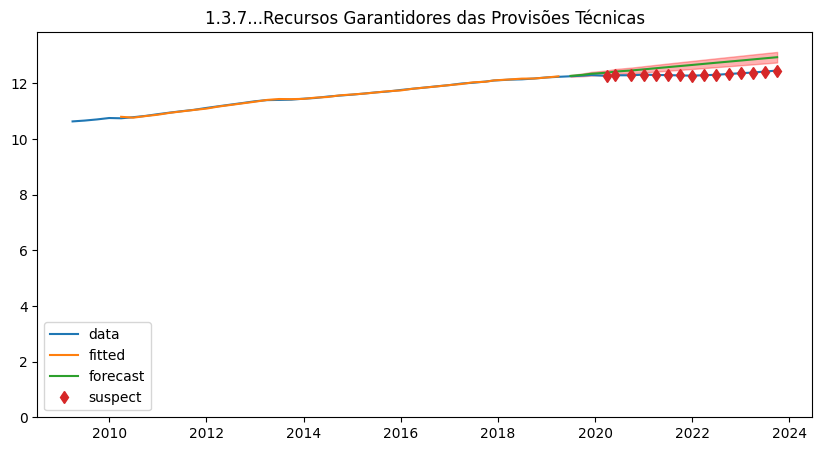

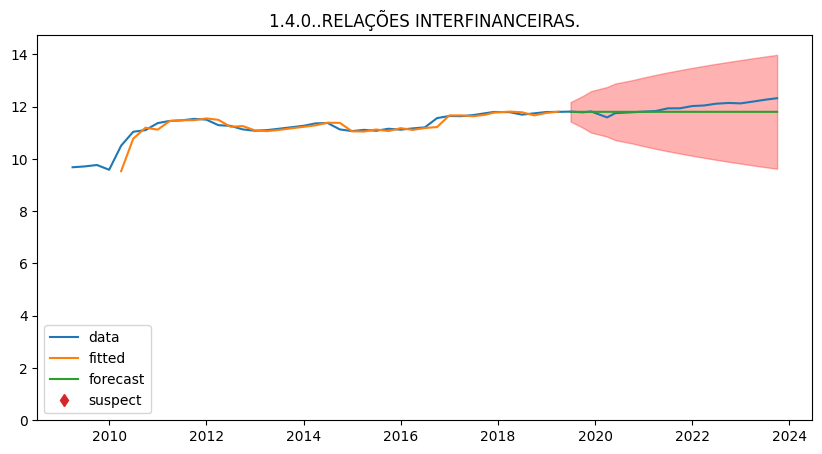

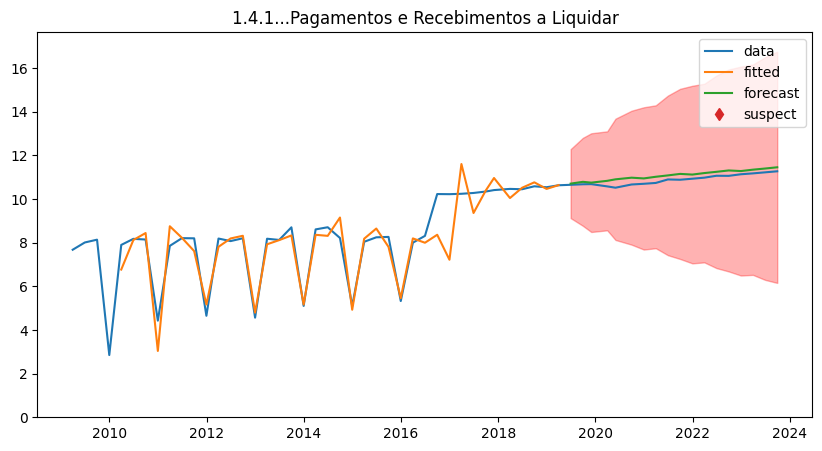

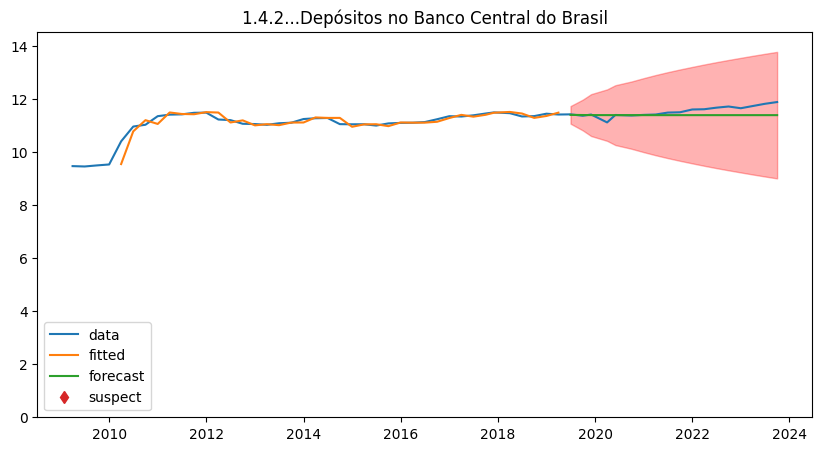

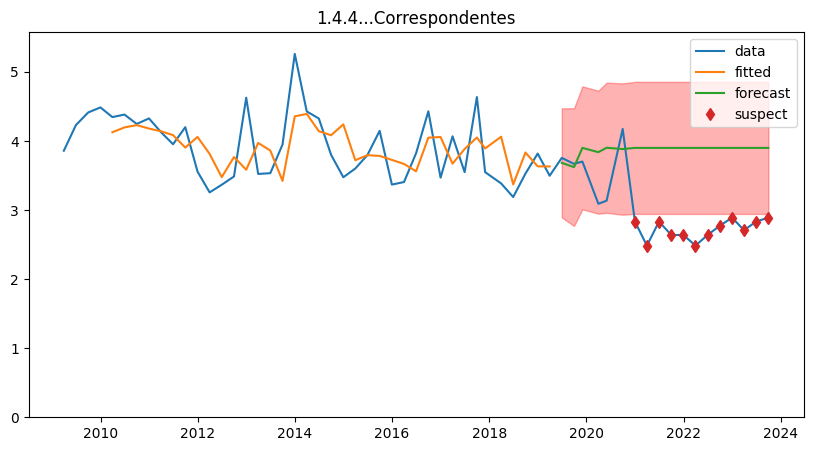

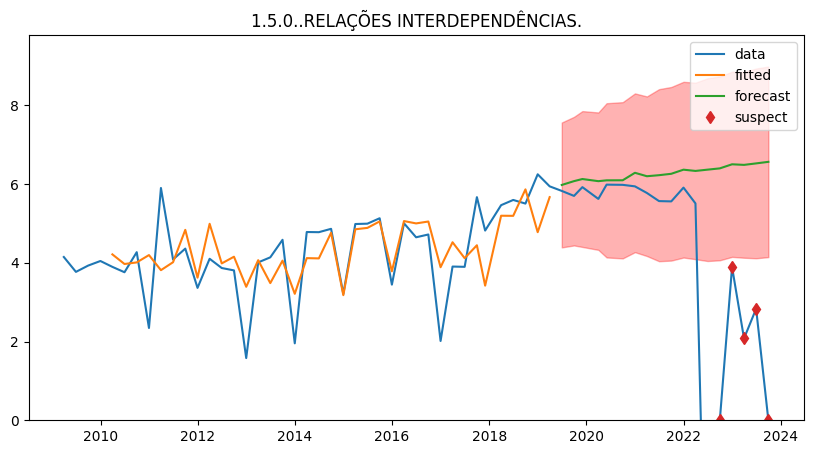

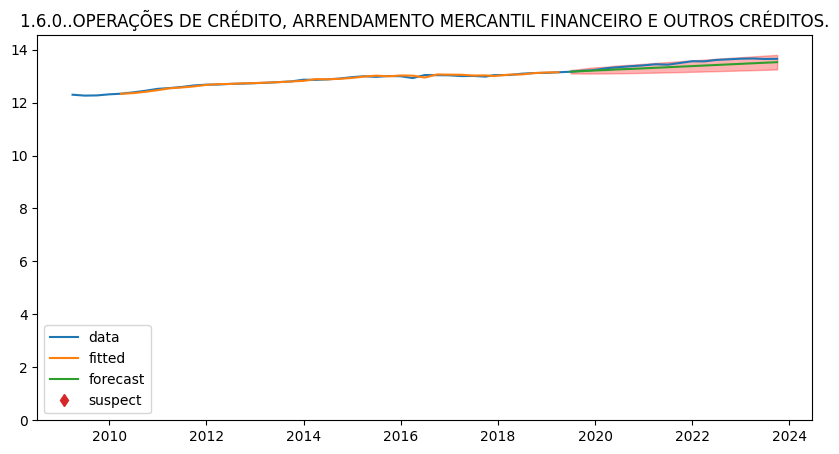

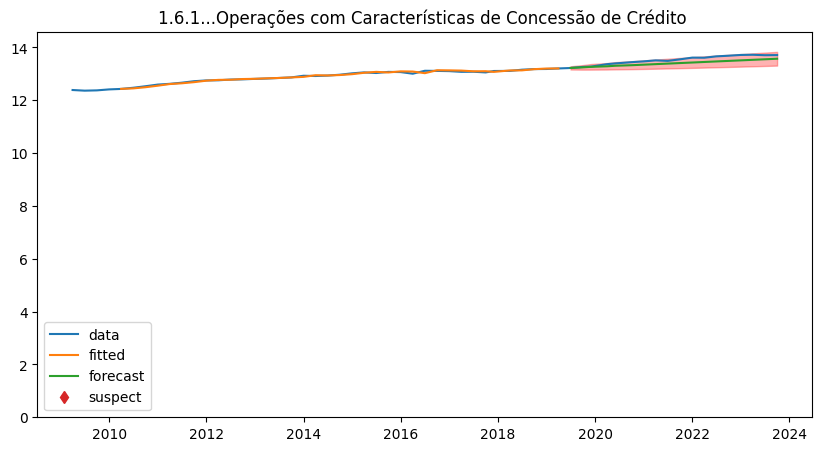

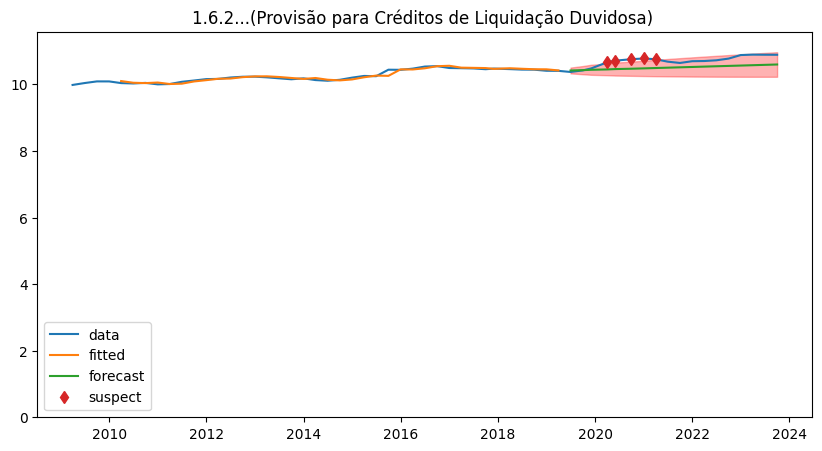

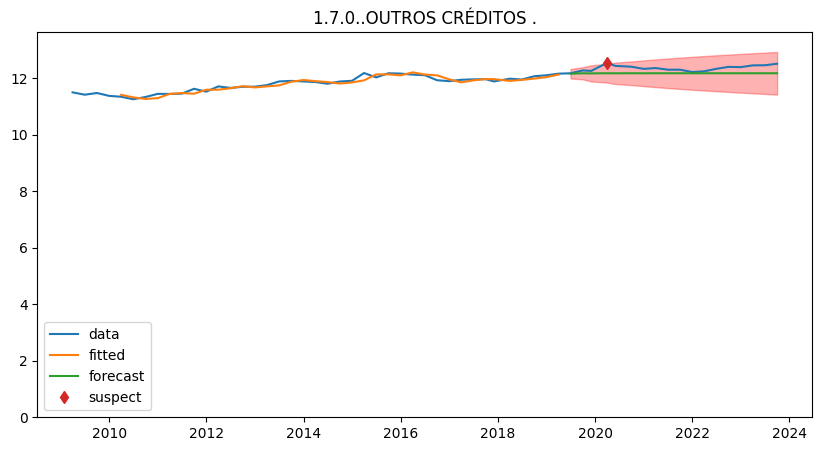

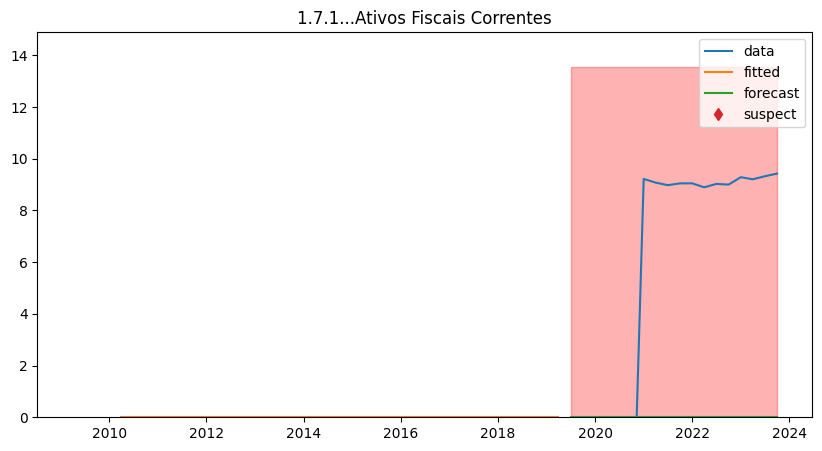

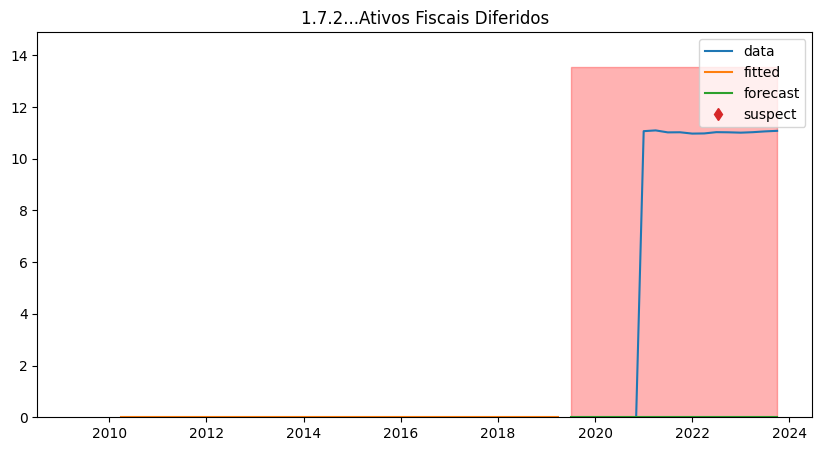

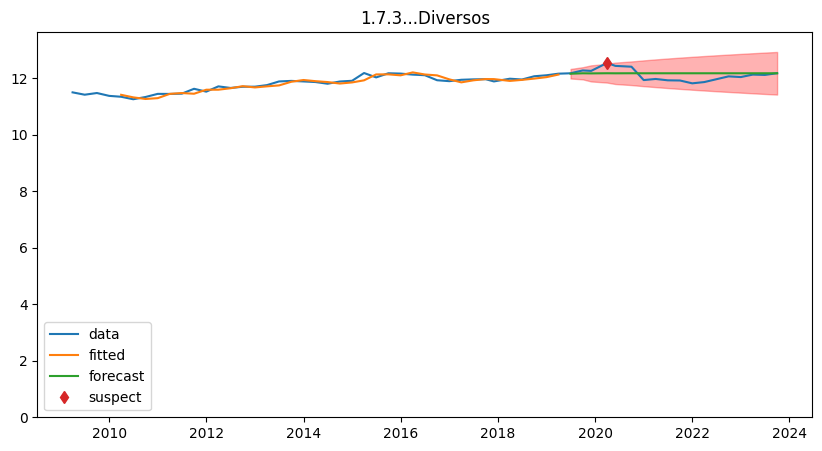

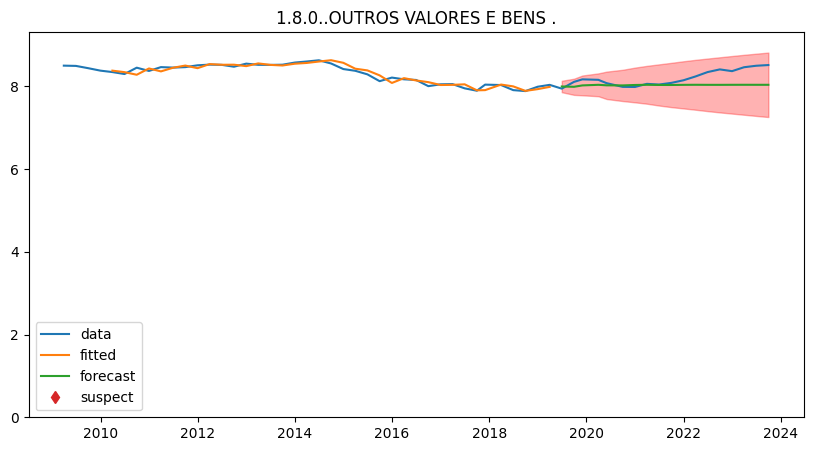

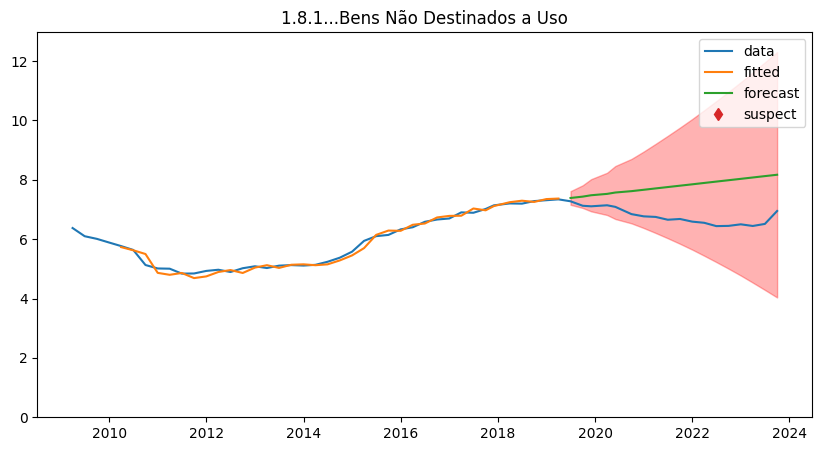

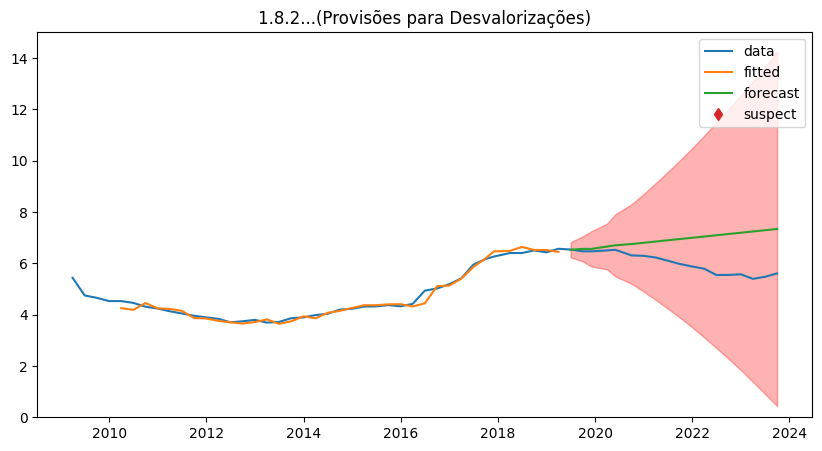

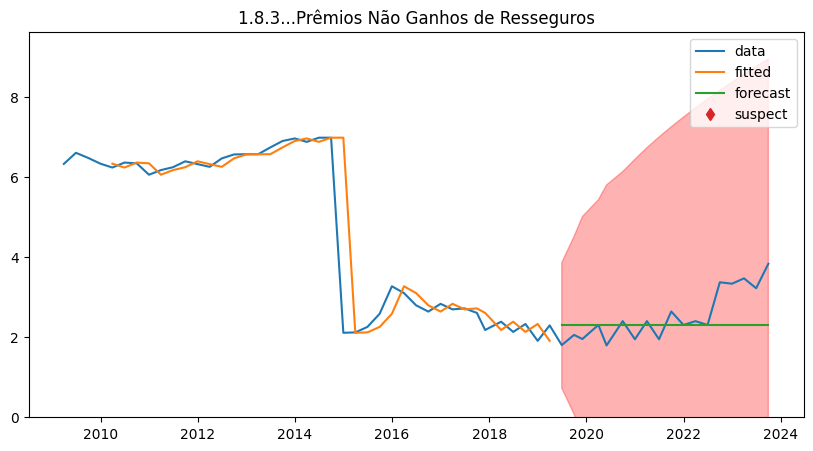

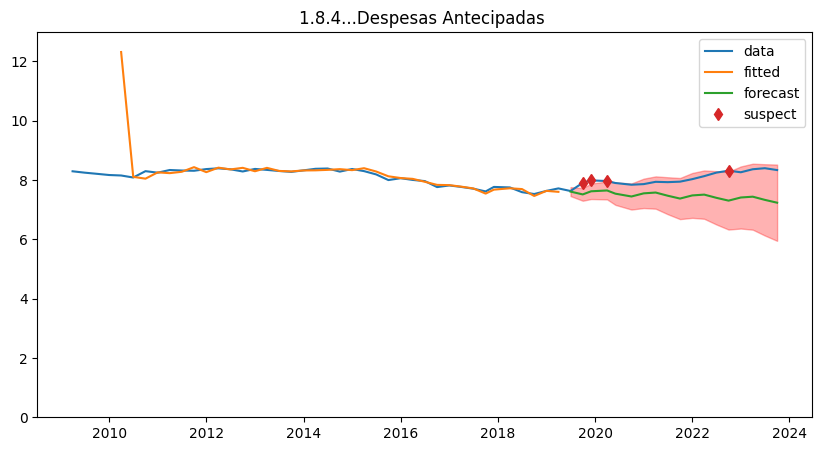

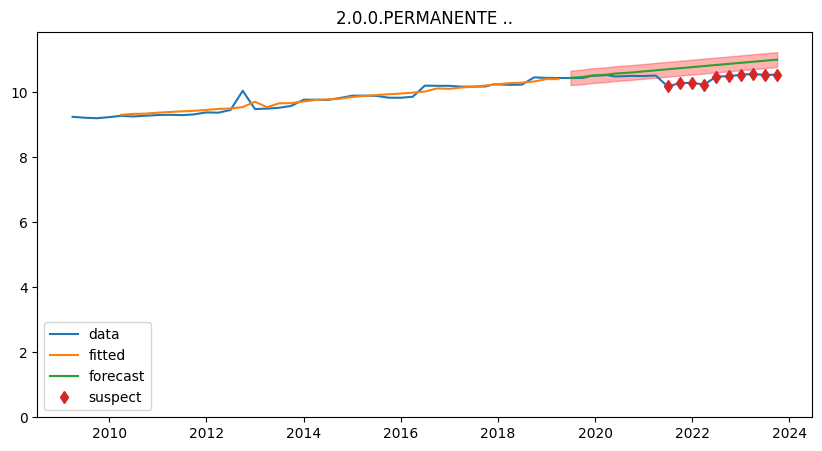

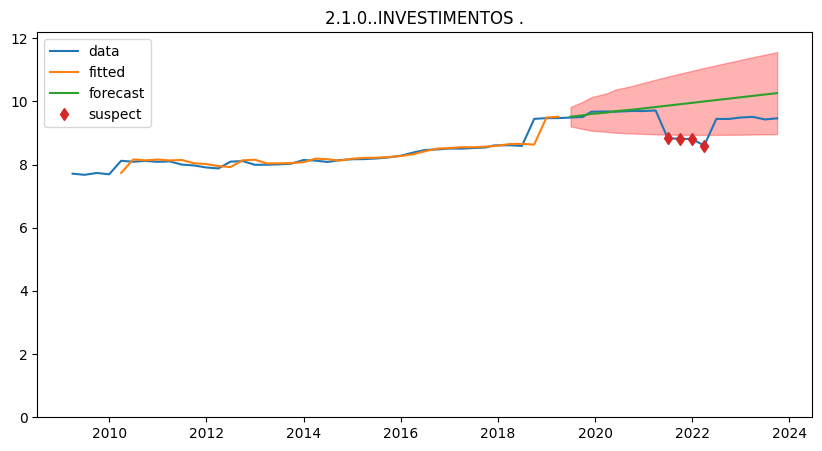

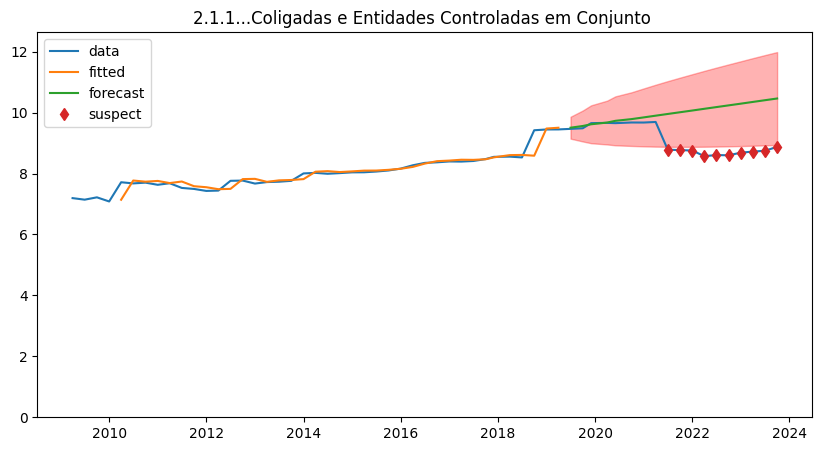

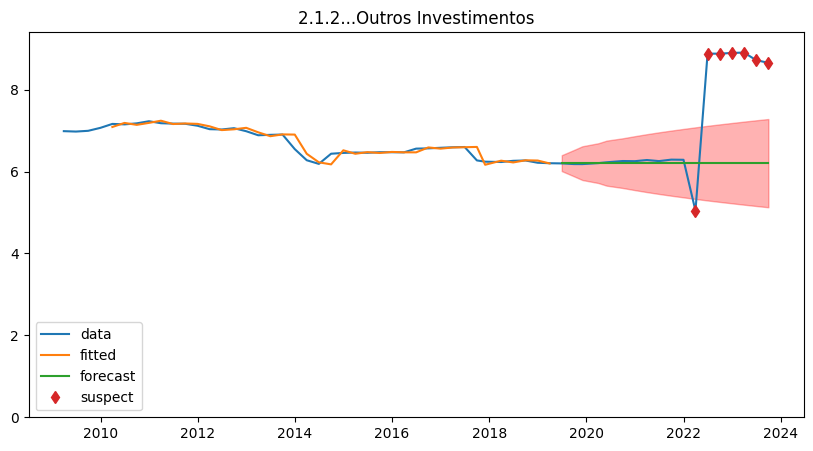

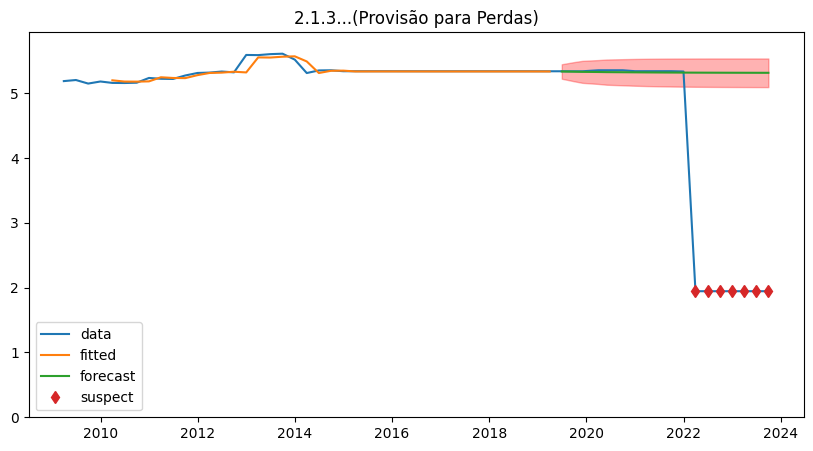

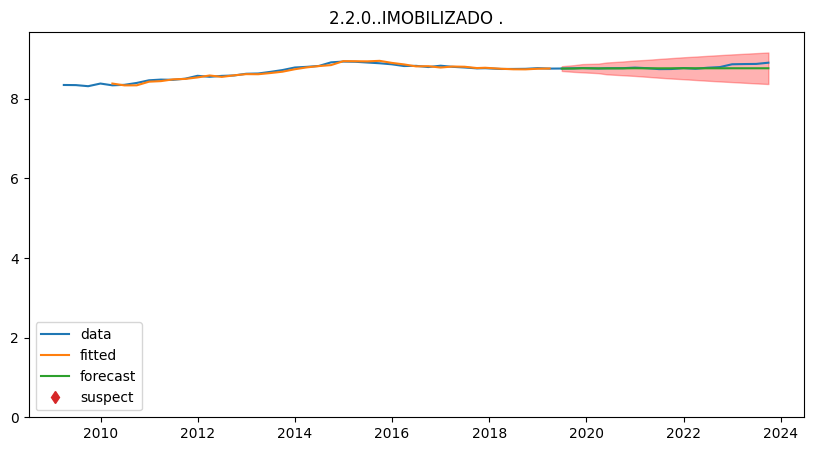

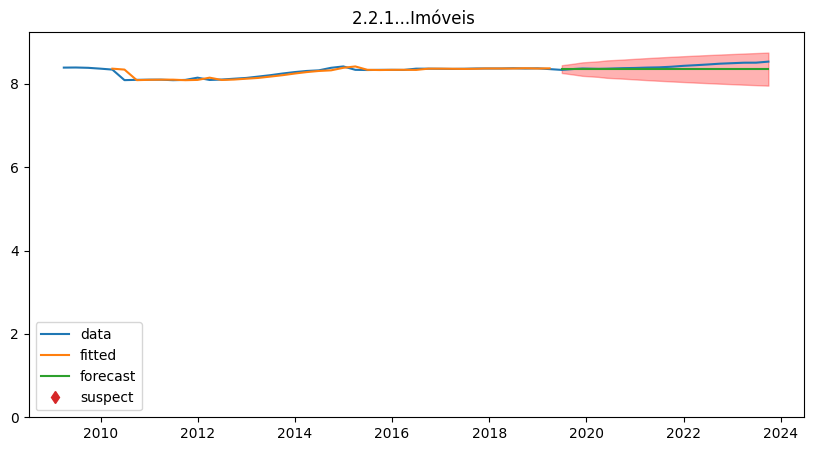

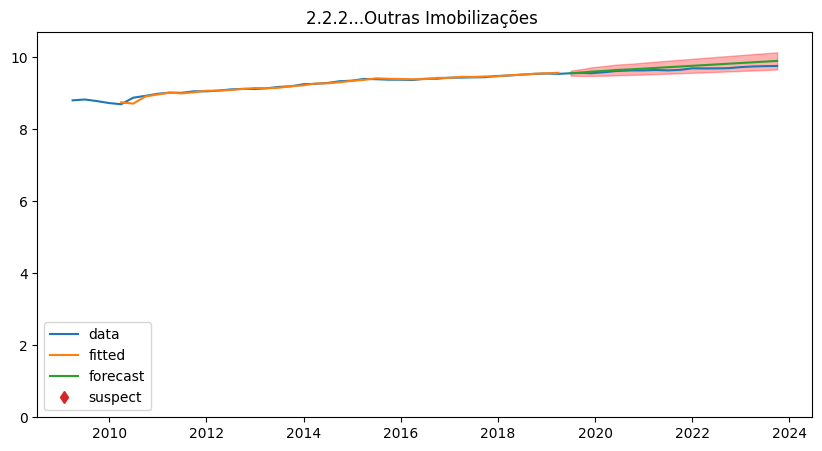

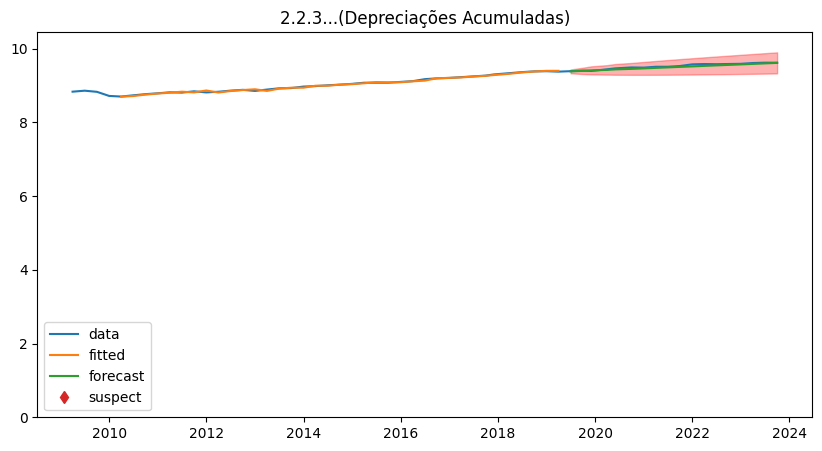

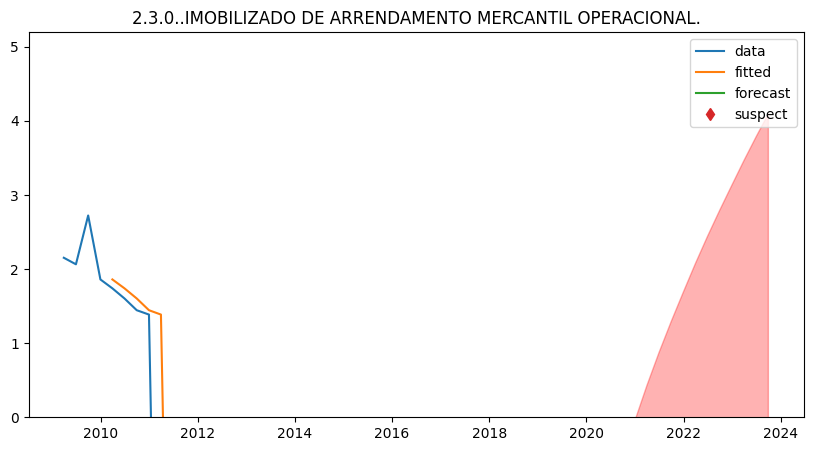

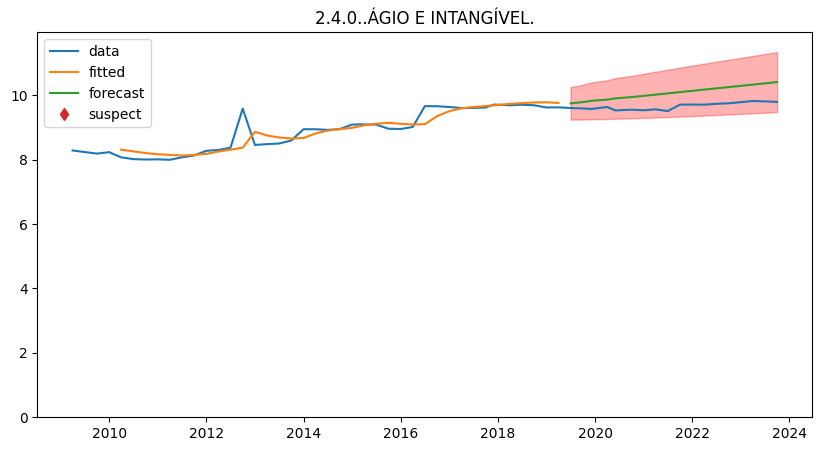

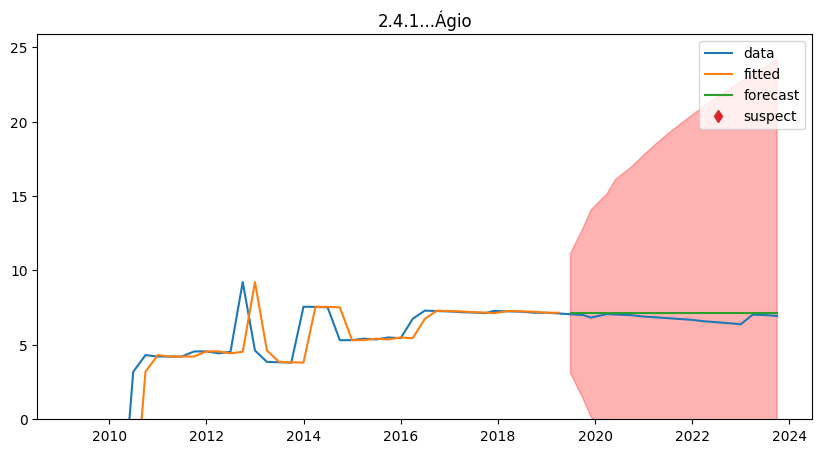

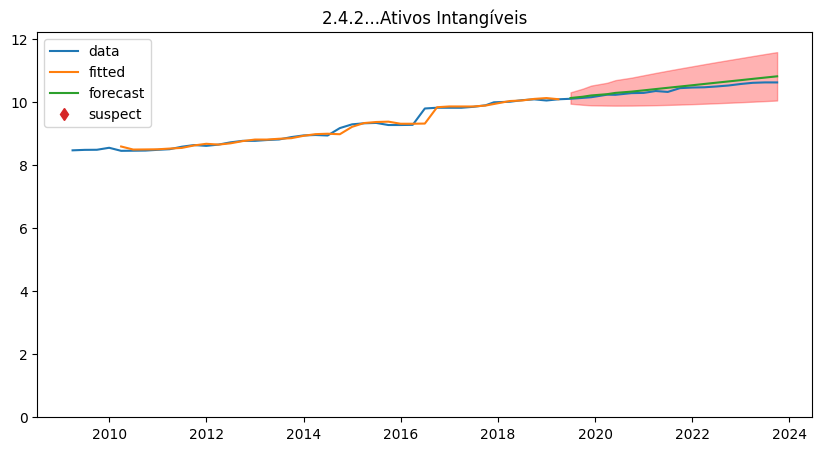

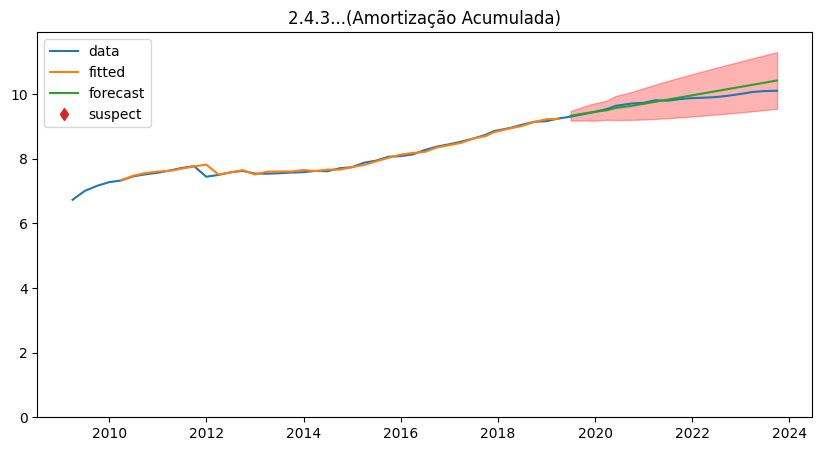

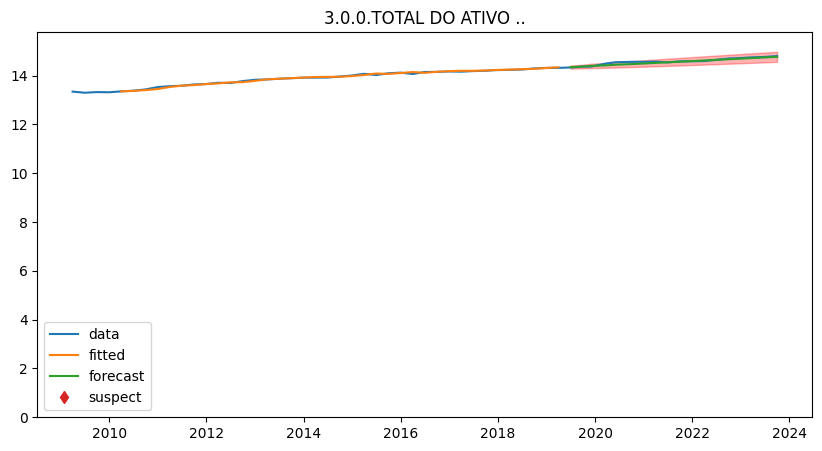

In [49]:
import warnings
warnings.filterwarnings("ignore")
df.replace(np.nan, 0, inplace=True)


for (columnName, columnData) in df.items():
    if (columnName != 'dataLoop'and columnName != 'LogDataLoop' and 
        columnName != 'data' and columnName != 'LogData' and df[columnName].dtypes=='float64'):
        print('Column Name : ', columnName)
        print('Column Type : ', df[columnName].dtypes)
              
        
        """"""
        df['dataLoop']=df[columnName]
        df['dataLoop'].replace(0, 0.001, inplace=True)
        df['dataLoop'] = df['dataLoop'].abs()
        
        df['LogDataLoop'] = np.log(df['dataLoop'])
        
        split = int (0.7*len(df))
        Ntest = len(df)-split
        train = df.iloc[:-Ntest]
        test = df.iloc[-Ntest:]
        
        model = pm.auto_arima(train['LogDataLoop'],
                      trace=False,
                      method='bfgs', 
                      suppress_warnings=True,
                      seasonal=True, m=4)
        
        
        train_pred = model.predict_in_sample(start=4, end=-1)
        test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True,alpha=0.05)

        
        df_diff_upper=[]
        df_diff_lower=[]
        df_diff_pred_data=[]

        negatives=[]
        j = 0
        for i in df['LogDataLoop'].iloc[-Ntest:]:
            #upper 0
            df_diff_upper.append(confint[j,1] - i)
            if (confint[j,1] - i)<0:
                negatives.append(j)
            j += 1


        j = 0
        for i in df['LogDataLoop'].iloc[-Ntest:]:
            #upper 0
            df_diff_lower.append(i-confint[j,0])
            if (i-confint[j,0])<0:
                negatives.append(j)
            j += 1

        negatives = list( dict.fromkeys(negatives) ) 

        j = 0
        for i in df['LogDataLoop'].iloc[-Ntest:]:
            #pred
            df_diff_pred_data.append(abs(i-test_pred.iloc[j]))
            j += 1

        df_suspect = test_pred.copy()
        df_suspect.values[:] = -1

        for i in negatives:
            df_suspect.values[i] = df['LogDataLoop'].iloc[-Ntest:][i]
            
        print('Column Name : '+ columnName + ' Has ' +str(len(negatives))+ ' Suspects ') 
        
        
        train_pred = model.predict_in_sample(start=4, end=-1)
        test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True,alpha=0.05)

        fig, ax = plt.subplots(figsize=(10, 5))
        #generalizar dataframe de dados
        ax.plot(df.index, df['LogDataLoop'], label='data')
        ax.plot(train.index[4:], train_pred, label='fitted')
        ax.plot(test.index, test_pred, label='forecast')
        ax.plot(test.index, df_suspect, label='suspect', marker='d', linestyle='None')
        ax.fill_between(test.index, \
                        confint[:,0], confint[:,1], \
                        color='red', alpha=0.3)
        ax.set_title(columnName)
        ax.set_ylim(ymin=0)
        ax.legend();
        """"""